# 🟣 ➡️ 🟡 ➡️ 🟠  <span style="color:#6f5b85;">  Point defect diffusion in a metal <span>

In crystalline metals, **point defects** are local disruptions in the otherwise regular atomic arrangement. These imperfections are crucial to understanding diffusion, mechanical behavior, and other properties.

The main types of point defects include:

- **Vacancy**: A missing atom in the lattice, which can facilitate atomic migration.
- **Self-Interstitial**: An extra atom from the same element squeezed into a space between lattice sites.
- **Substitutional Impurity**: A foreign atom replacing a host atom.
- **Interstitial Impurity**: A smaller foreign atom (e.g., hydrogen) positioned in the gaps between regular atoms.

Below, we visualize each of these point defects in a 3D metallic FCC crystal using **ASE**.


In [3]:
from ase.build import bulk
from ase import Atom
import nglview as nv

al = bulk('Ni', 'fcc', a=3.52, cubic =True).repeat((2, 2, 2))

# 1. Vacancy (retirer un atome)
vacancy = al.copy()
vacancy.pop(1)  # retirer l'atome d'indice 1

# 2. Self-Interstitial (ajouter un atome Al dans un site interstitiel)
interstitial = al.copy()
interstitial.append(Atom('Ni', position=(1.76, 0, 0)))

# 3. Substitutional impurity (remplacer un atome par Cu)
substitutional = al.copy()
substitutional[13].symbol = 'Al'

# 4. Interstitial impurity (ajouter un atome H dans un site interstitiel)
interstitial_H = al.copy()
interstitial_H.append(Atom('H', position=(0.88, 0.88, 0.88)))

### <span style="color:#60a976;"> To do: Visualize each defect. <span>

In [4]:
view = nv.show_ase(vacancy)
view.add_unitcell()
view.background = 'white'
view.camera = 'orthographic'
view

NGLWidget()

## <span style="color:#957bb1;"> Hydrogen diffusion in Ni <span>

### 1) Build the system with hydrogen

**Hydrogen diffusion in metals** is a critical phenomenon, especially in the context of **hydrogen embrittlement**. 

In face-centered cubic (FCC) metals like aluminum, hydrogen atoms can occupy **interstitial sites**, typically the **tetrahedral** and **octahedral** positions within the crystal lattice. 

These sites differ in their local atomic environments and stability.

In a FCC structure:

- Octahedral sites are located at the centers of the cube edges and at the center of the unit cell. Each octahedral site is coordinated by six atoms, forming an octahedron.

- Tetrahedral sites are found at positions like (1/4, 1/4, 1/4) in fractional coordinates. Each tetrahedral site is coordinated by four atoms, forming a tetrahedron.

In this part of the tutorial, we will use atomistic calculations to evaluate the stability of hydrogen in both tetrahedral and octahedral interstitial sites in aluminum. This will help us determine which site is energetically preferred and sets the stage for simulating hydrogen diffusion mechanisms.


In [5]:
from ase.calculators.lammpsrun import LAMMPS
import os
from ase.optimize import BFGS
import numpy as np
from ase.build import bulk

# Set the path to the LAMMPS executable
os.environ["ASE_LAMMPSRUN_COMMAND"] = "lammps_ase/build/lmp"
os.environ["LD_LIBRARY_PATH"] = "lammps_ase/build:" + os.environ.get("LD_LIBRARY_PATH", "")

# assign the potential to the system build in LAMMPS
parameters = {'pair_style': 'eam/alloy', 'pair_coeff': ['* * Potential/NiAlH_jea.eam.alloy Ni'] }
files = ['Potential/NiAlH_jea.eam.alloy']  
lammps = LAMMPS(files=files, **parameters)

parameters = {'pair_style': 'eam/alloy', 'pair_coeff': ['* * Potential/NiAlH_jea.eam.alloy H Ni '] }
files = ['Potential/NiAlH_jea.eam.alloy']  
lammps_H = LAMMPS(files=files, **parameters)


# Cell without defects

unit_cell = bulk('Ni', crystalstructure='fcc', a=3.52, cubic=True)
bulk = unit_cell.repeat((4, 4, 4))

a = 3.52
pos_octa = np.array([0.5 * a, 0.0, 0.0])
pos_tetra = np.array([0.25 * a, 0.25 * a, 0.25 * a])

# Cell with H in octahedric site
octa = bulk.copy()
octa.append(Atom('H', position=pos_octa))

# Cell with H in tetrahedric site
tetra = bulk.copy()
tetra.append(Atom('H', position=pos_tetra))

# Attach calculator to atoms
bulk.calc = lammps
tetra.calc = lammps_H
octa.calc = lammps_H


### <span style="color:#60a976;"> To do: Minimize the cells and visualized it. <span>

In [6]:
print('\n Energy minimisation for cell with hydrogen in tetrahedric site')
opt = BFGS(tetra)  
opt.run(fmax=0.001) 


view = nv.show_ase(tetra)
view.add_unitcell()
view.background = 'white'
view.camera = 'orthographic'
view


 Energy minimisation for cell with hydrogen in tetrahedric site
      Step     Time          Energy          fmax
BFGS:    0 15:37:05    -1140.769859        1.409569
BFGS:    1 15:37:05    -1140.868036        0.920135
BFGS:    2 15:37:05    -1140.957115        0.151197
BFGS:    3 15:37:05    -1140.963799        0.133563
BFGS:    4 15:37:05    -1140.971004        0.110159
BFGS:    5 15:37:05    -1140.975236        0.090442
BFGS:    6 15:37:05    -1140.977405        0.034229
BFGS:    7 15:37:05    -1140.978513        0.030184
BFGS:    8 15:37:05    -1140.979443        0.043325
BFGS:    9 15:37:05    -1140.980175        0.036942
BFGS:   10 15:37:05    -1140.980548        0.012411
BFGS:   11 15:37:05    -1140.980724        0.009809
BFGS:   12 15:37:05    -1140.980855        0.016537
BFGS:   13 15:37:06    -1140.980951        0.013682
BFGS:   14 15:37:06    -1140.980997        0.004341
BFGS:   15 15:37:06    -1140.981016        0.002219
BFGS:   16 15:37:06    -1140.981027        0.004578
B

NGLWidget()

In [7]:
print('\n Energy minimisation for cell with hydrogen in octahedric site')
opt = BFGS(octa)  
opt.run(fmax=0.0001) 

view = nv.show_ase(octa)
view.add_unitcell()
view.background = 'white'
view.camera = 'orthographic'
view


 Energy minimisation for cell with hydrogen in octahedric site
      Step     Time          Energy          fmax
BFGS:    0 15:37:09    -1141.320002        0.607376
BFGS:    1 15:37:09    -1141.348893        0.422377
BFGS:    2 15:37:09    -1141.381831        0.065547
BFGS:    3 15:37:09    -1141.383840        0.055414
BFGS:    4 15:37:09    -1141.387535        0.055342
BFGS:    5 15:37:09    -1141.388727        0.030020
BFGS:    6 15:37:09    -1141.389404        0.013507
BFGS:    7 15:37:09    -1141.389844        0.019883
BFGS:    8 15:37:10    -1141.390285        0.023658
BFGS:    9 15:37:10    -1141.390524        0.011663
BFGS:   10 15:37:10    -1141.390644        0.004995
BFGS:   11 15:37:10    -1141.390725        0.009087
BFGS:   12 15:37:10    -1141.390791        0.009790
BFGS:   13 15:37:10    -1141.390824        0.004512
BFGS:   14 15:37:10    -1141.390835        0.001838
BFGS:   15 15:37:10    -1141.390840        0.002082
BFGS:   16 15:37:10    -1141.390843        0.001873
BF

NGLWidget()

### 2) Compute energy barrier 

In face-centered cubic (fcc) metals, hydrogen diffuses by migrating **between tetrahedral and octahedral interstitial sites**. To study this diffusion process, we will compute the hydrogen diffusion path. The energy barrier associated with hydrogen migration between these sites will be determined using the **Nudged Elastic Band (NEB)** method.

The **Nudged Elastic Band (NEB)** method is a computational technique used to find the **Minimum Energy Path (MEP)** between two known states of a system, such as a diffusion event or a chemical reaction. This path gives insight into the **activation energy** and the **transition state** of the process.

NEB works by interpolating a series of intermediate configurations (called **images**) between the initial and final states:

$$
\mathbf{R}_0, \mathbf{R}_1, \dots, \mathbf{R}_N
$$

The total force on each intermediate image $\mathbf{R}_i$ is given by:

$$
\mathbf{F}_i = -\nabla V(\mathbf{R}_i)_{\perp} + \mathbf{F}_i^{\text{spring}, \parallel}
$$

Where:

- $ \nabla V(\mathbf{R}_i)_{\perp} $ is the **perpendicular component** of the true force (from the potential energy surface).
- $ \mathbf{F}_i^{\text{spring}, \parallel} $ is the **parallel component** of the artificial spring force between neighboring images.

The spring force maintains even spacing between images, while the true force moves images toward the MEP. The perpendicular component avoids sliding down to the minima.

The **transition state** is identified as the image along the path with the **highest energy**.

> NEB is essential in atomistic simulations for exploring energy barriers in diffusion, adsorption, desorption, and reaction mechanisms.


### <span style="color:#60a976;"> To do: NEB calculations with ASE for hydrogen. <span>

In [8]:
from ase.mep import NEB  
import nglview as nv
from ase import Atom
from ase.io import read
from ase.mep import NEBTools

# Nombre total d’images (initiale + intermédiaires + finale)
n_images = 8

# Créer la liste des images (copies ASE)
images = [tetra.copy()]  # image initiale
for _ in range(n_images - 2):
    images.append(tetra.copy())  # images intermédiaires
images.append(octa.copy())  # image finale

# Interpolation linéaire entre les images (ou utilisez method='idpp' pour + réaliste)
neb = NEB(images)
neb.interpolate()
for image in images:
    image.calc = LAMMPS(files=files, **parameters)
    
opt = BFGS(neb)  # pour suivre la convergence si besoin
opt.run(fmax=0.005)


      Step     Time          Energy          fmax
BFGS:    0 15:37:24    -1140.868627        0.689701
BFGS:    1 15:37:28    -1140.884694        0.502757
BFGS:    2 15:37:33    -1140.912591        0.242753
BFGS:    3 15:37:37    -1140.915418        0.179965
BFGS:    4 15:37:42    -1140.921188        0.112378
BFGS:    5 15:37:46    -1140.922685        0.055140
BFGS:    6 15:37:51    -1140.923375        0.054511
BFGS:    7 15:37:55    -1140.923863        0.056756
BFGS:    8 15:38:00    -1140.924475        0.049600
BFGS:    9 15:38:05    -1140.924814        0.024836
BFGS:   10 15:38:10    -1140.924976        0.018322
BFGS:   11 15:38:15    -1140.925118        0.029314
BFGS:   12 15:38:20    -1140.925276        0.027016
BFGS:   13 15:38:25    -1140.925372        0.017981
BFGS:   14 15:38:30    -1140.925411        0.010590
BFGS:   15 15:38:36    -1140.925446        0.018585
BFGS:   16 15:38:41    -1140.925494        0.017105
BFGS:   17 15:38:47    -1140.925530        0.012317
BFGS:   18 15:

True

### <span style="color:#60a976;"> To do: Visualize the NEB results. Based on the energy profile, determine whether it is more favorable for the hydrogen atom to occupy the octahedral or the tetrahedral site. <span>

### <span style="color:#e83f3f;"> Carefull: the results must not depend on the cell size. <span>

    

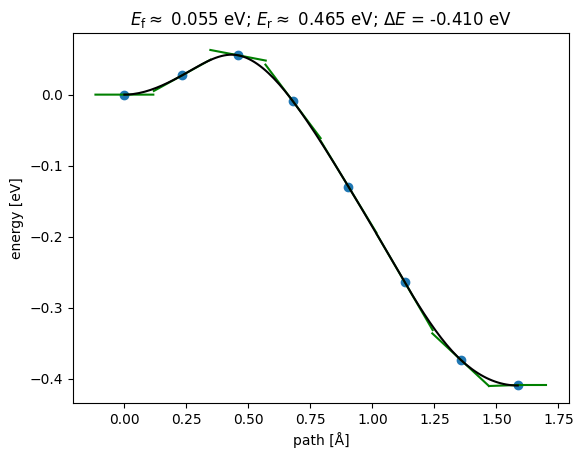

In [7]:
nebtools = NEBTools(images)
Ef, dE = nebtools.get_barrier(fit=False)

max_force = nebtools.get_fmax()
fig = nebtools.plot_band()

### <span style="color:#60a976;"> To do: Visualize NEB results for the atomic configuration of each image. <span>

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output

output = widgets.Output()

def create_viewer(index):
    view = nv.show_ase(images[index])
    view.add_representation('ball+stick')
    view.center()
    return view

slider = widgets.IntSlider(min=0, max=n_images - 1, step=1, description='Image')

def on_slider_change(change):
    with output:
        clear_output(wait=True)
        view = create_viewer(change['new'])
        display(view)

slider.observe(on_slider_change, names='value')

with output:
    display(create_viewer(0))

display(slider, output)


IntSlider(value=0, description='Image', max=7)

Output()

### 3) MD simulations 


Molecular Dynamics (MD) is a computational technique that simulates the time evolution of a system of atoms by numerically integrating Newton’s equations of motion:

$$
m_i \frac{d^2 \mathbf{r}_i}{dt^2} = \mathbf{F}_i
$$

where $ m_i$ and $\mathbf{r}_i$ are the mass and position of atom $ i $, and $\mathbf{F}_i$ is the force acting on it, usually derived from an interatomic potential.

MD simulations can be performed under different statistical ensembles, which define which thermodynamic variables are held constant:

- **Microcanonical ensemble (NVE):** Number of particles $N$, volume $V$, and energy $E$ are constant. This ensemble conserves total energy, and the system evolves naturally without external thermostat or barostat.

- **Canonical ensemble (NVT):** Number of particles $N$, volume $V$, and temperature $T$ are constant. Temperature is controlled using a thermostat, which exchanges energy with a heat bath to maintain the desired temperature.

- **Isothermal–isobaric ensemble (NPT):** Number of particles $N$, pressure $P$, and temperature $T$ are constant. Both temperature and pressure are controlled via thermostat and barostat, allowing the system volume to fluctuate.

For studying **diffusion processes**, the **NVT ensemble** is often chosen because it maintains a stable temperature, which is crucial for correctly modeling atomic motions and jump frequencies over the timescale of the simulation. The thermostat ensures the system remains at the target temperature, allowing us to observe thermally activated diffusion events.

To simulate a system at constant temperature (canonical ensemble, NVT), we introduce a thermostat. One widely used thermostat is the **Nosé–Hoover thermostat**, which modifies the equations of motion to include a fictitious variable $\xi$ representing thermal friction:

$$
m_i \frac{d^2 \mathbf{r}_i}{dt^2} = \mathbf{F}_i - m_i \xi \frac{d \mathbf{r}_i}{dt}
$$

$$
\frac{d \xi}{dt} = \frac{1}{Q} \left( \sum_i \frac{m_i \left(\frac{d \mathbf{r}_i}{dt}\right)^2}{k_B T} - N \right)
$$

Here, $\xi$ is the thermostat variable, $Q$ is a fictitious mass parameter for the thermostat, $T$ is the target temperature, and $N$ is the number of degrees of freedom. This thermostat ensures that the system fluctuates around the desired temperature by coupling it to a heat bath.



### <span style="color:#60a976;"> To do: Is it possible to capture hydrogen diffusion in MD ? <span>


To gain insights into hydrogen diffusion in metals, it is important to estimate how frequently hydrogen atoms can jump between interstitial sites at a given temperature. This jump frequency is typically modeled using an Arrhenius-type expression, which depends exponentially on the migration energy barrier $E_a$ and the temperature $T$:

$$
\Gamma = \nu \, e^{-\frac{E_a}{k_B T}}
$$

where $\nu$ is an attempt frequency and $k_B$ is the Boltzmann constant.

**It is important to note that this is a simplified approximation** that assumes a constant attempt frequency and neglects other complex effects such as vibrational entropy changes or interactions with defects.

By estimating this jump frequency, we can get a rough idea of whether hydrogen migration events are likely to occur within the accessible timescales of molecular dynamics simulations (few ns) or if they are too rare to be directly observed. This helps guide the choice of simulation approaches and enhances our qualitative understanding of hydrogen diffusion kinetics in the material.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
kB = 8.617e-5  # eV/K - Boltzmann constant
nu0 = 1e13     # Hz - Attempt frequency (typical for solids)

# Widgets: temperature (slider) and energy barrier (text input)
temp_slider = widgets.FloatSlider(
    value=300, min=50, max=1500, step=10,
    description='Temperature (K):', continuous_update=False
)

Ea_input = widgets.FloatText(
    value=0.45,
    description='Barrier (eV):',
    step=0.01
)

# Output area
output = widgets.Output()

# Update function
def update(T, Ea):
    with output:
        output.clear_output(wait=True)
        
        jump_frequency = nu0 * np.exp(-Ea / (kB * T))
        time_between_jumps = 1 / jump_frequency
        
        print(f"Temperature: {T:.1f} K")
        print(f"Energy barrier: {Ea:.3f} eV")
        print(f"Jump frequency: {jump_frequency:.2e} Hz")
        print(f"Mean time between jumps: {time_between_jumps * 1e9:.2f} ns")
        
        # Plot frequency vs temperature
        Ts = np.linspace(50, 1500, 300)
        freqs = nu0 * np.exp(-Ea / (kB * Ts))
        
        plt.figure(figsize=(6, 4))
        plt.plot(Ts, freqs, label="Jump frequency")
        plt.axvline(T, color='red', linestyle='--', label="Selected temperature")
        plt.yscale('log')
        plt.xlabel("T (K)")
        plt.ylabel("Jump frequency (Hz)")
        plt.title("Temperature dependence of jump frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

# Interactivity
ui = widgets.VBox([Ea_input, temp_slider])
widgets.interactive_output(update, {'T': temp_slider, 'Ea': Ea_input})
display(ui, output)


Output()

### <span style="color:#60a976;"> To do: Is it possible to capture hydrogen diffusion in MD ? <span>


**ASE** allows you to perform MD simulations via lammps for instance. 

To perform MD in ASE, you need:
1. A well-defined atomic structure (`Atoms` object), here for instance: tetra.
2. A calculator attached to the atoms (e.g., EMT, GPAW, VASP) to compute forces and energies.
3. An MD integrator, such as `VelocityVerlet` or `Langevin`, possibly combined with thermostats like `NoseHoover`.

Here is a minimal example to run MD in the NVT ensemble, ensure energy convergence by monitoring potential, kinetic, and total energies during the simulation:

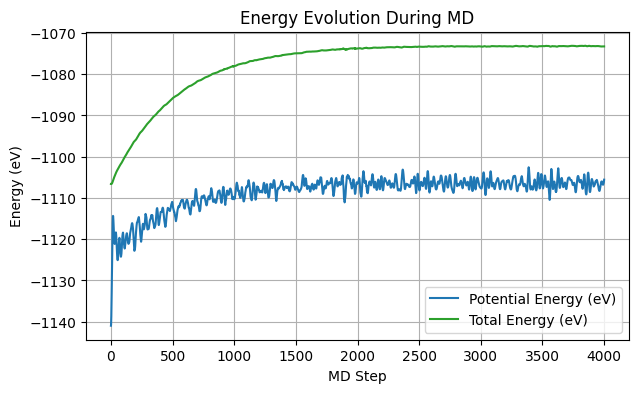

True

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ase 
from ase import units
from ase.io.trajectory import Trajectory
from ase.md.verlet import VelocityVerlet
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.nvtberendsen import NVTBerendsen

atoms = tetra.copy()
atoms.calc = lammps_H

temperature = 1000  # Kelvin
MaxwellBoltzmannDistribution(atoms, temperature_K=temperature)

traj = Trajectory('md.traj', 'w', atoms)

n_steps = 4000

tau = 500 * units.fs  # thermostat relaxation time
timestep = 2 * units.fs


dyn = NVTBerendsen(atoms, timestep, temperature_K=temperature, taut= tau)

dyn.attach(traj.write, interval=10)

epot_list = []
ekin_list = []

def log_energies():
    epot = atoms.get_potential_energy()
    ekin = atoms.get_kinetic_energy()
    epot_list.append(epot)
    ekin_list.append(ekin)

    if dyn.nsteps % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(7, 4))
        plt.plot(epot_list, label='Potential Energy (eV)', color='tab:blue')
        #plt.plot(ekin_list, label='Kinetic Energy (eV)', color='tab:orange')
        plt.plot(np.array(epot_list) + np.array(ekin_list), label='Total Energy (eV)', color='tab:green')
        plt.xlabel('MD Step')
        plt.ylabel('Energy (eV)')
        plt.title('Energy Evolution During MD')
        plt.legend()
        plt.grid(True)
        display(plt.gcf())
        plt.close()

dyn.attach(log_energies, interval=1)

dyn.run(n_steps)


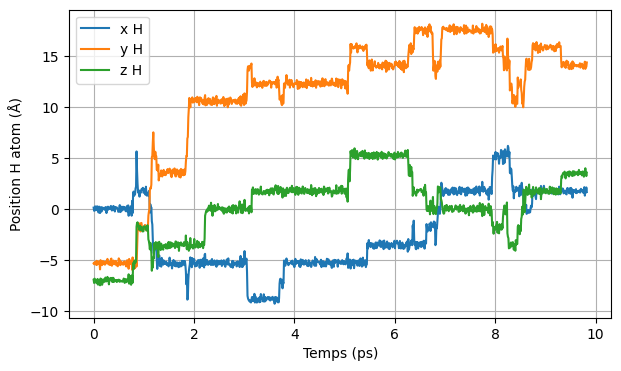

True

In [21]:

n_steps = 50000

tau = 500 * units.fs  # thermostat relaxation time
timestep = 2 * units.fs

# Initialisation de la dynamique NVT
dyn = NVTBerendsen(atoms, timestep, temperature_K=temperature, taut=tau)

# Indices des atomes d'hydrogène
hydrogen_indices = [atom.index for atom in atoms if atom.symbol == 'H']

# Positions initiales des hydrogènes pour calcul MSD
pos0 = atoms.positions[hydrogen_indices].copy()


# Listes pour stocker MSD et temps
x_list = []
y_list = []
z_list = []

time_list = []

# Intervalle d'attachement du calcul (en nombre de steps)
interval = 50

def compute_H():
    pos = atoms.positions[hydrogen_indices]
    x = pos[0][0]
    y = pos[0][1]
    z = pos[0][2]
    
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    
    current_step = dyn.nsteps
    # timestep est un Quantity : récupérer la valeur en fs
    time_fs = current_step * timestep
    time_ps = time_fs / 1000 
    time_list.append(time_ps)
    
    clear_output(wait=True)
    plt.figure(figsize=(7,4))
    plt.plot(time_list, x_list, label='x H')
    plt.plot(time_list, y_list, label='y H')
    plt.plot(time_list, z_list, label='z H')
    plt.xlabel('Temps (ps)')
    plt.ylabel('Position H atom (Å)')
    plt.title('')
    plt.legend()
    plt.grid(True)
    display(plt.gcf())
    plt.close()

dyn.attach(compute_H, interval=interval)

traj = Trajectory('md.traj', 'w', atoms)
dyn.attach(traj.write, interval=10)

dyn.run(n_steps)



In [23]:
from ase.io import write, read
traj_loaded = Trajectory('md.traj')
write('md.xyz', traj_loaded)

images = read('md.xyz', index=':')
n_images = len(images)

output = widgets.Output()

def create_viewer(index):
    view = nv.show_ase(images[index])
    view.add_representation('ball+stick')
    view.center()
    return view

slider = widgets.IntSlider(min=0, max=n_images - 1, step=1, description='Frame')

def on_slider_change(change):
    with output:
        clear_output(wait=True)
        view = create_viewer(change['new'])
        display(view)

slider.observe(on_slider_change, names='value')

with output:
    display(create_viewer(0))

display(slider, output)


IntSlider(value=0, description='Frame', max=5000)

Output()

### ✅ <span style="color:#60a976;"> Well done! You've successfully finished the first part of this tutorial.  <span>
 
### 👉 <span style="color:#60a976;"> Now continue with the second part, available in the notebook [`vacancy.ipynb`](./vacancy.ipynb). <span>
